# MNIST pattern recognizer

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np                                  # for data manipulation
import matplotlib.pyplot as plt                     # for plotting graphs
from keras.utils import np_utils                    # for getting the one-hot encoded vector
from sklearn import metrics                         # for calculating accuracy and confusion matrix
import pandas as pd                                 # for displaying confusion matrix
from sklearn.neural_network import MLPClassifier    # for inbuilt MLP

Using TensorFlow backend.


In [2]:
# loading data
train = np.loadtxt("mnist_train.csv", delimiter=",", skiprows = 1)
test = np.loadtxt("mnist_test.csv", delimiter=",", skiprows = 1)

# Part - A

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def sigmoid_dash(x):
    return sigmoid(x) * (1 - sigmoid(x))

def mse(y, pred_y):
    return np.mean(np.power(y - pred_y, 2))
    
def mse_dash(y, pred_y):
    return 2 * (pred_y - y) / y.size

In [4]:
# Base Class - initializing empty objects
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
        
    def forward_propagation(self, input):
        raise NotImplementedError
    
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [5]:
class NeuronLayer(Layer):
    def __init__(self, input_size, output_size):        
        # randomly allocating weights and bias
        self.W = np.random.rand(input_size, output_size) - 0.5
        self.b = np.random.rand(1, output_size) - 0.5
        
    def forward_propagation(self, input_data):
        # Xw + b
        self.input = input_data
        self.output = self.input @ self.W + self.b
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        input_error = output_error @ self.W.T
        w_error = self.input.T @ output_error
        
        self.W -= learning_rate * w_error
        self.b -= learning_rate * output_error
        return input_error

In [6]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_dash):
        self.activation = activation
        self.activation_dash = activation_dash
        
    def forward_propagation(self, input_data):
        # simply passes the input through the activaction function
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        # multiplying derivative of the activation function and output error
        return self.activation_dash(self.input) * output_error

In [7]:
class Network:
    def __init__(self):
        self.layers = []
        
    def add(self, layer):
        self.layers.append(layer)
    
    def predict(self, input_data):
        result = []        
        for i in range(len(input_data)):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)        
        return result
    
    def fit(self, x_train, y_train, epochs, learning_rate):
        for i in range(epochs):
            error_dash = 0
            for j in range(len(x_train)):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                
                error_dash += mse(y_train[j], output)
                error = mse_dash(y_train[j], output)
                
                # back propagation 
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
                    
            error_dash /= len(x_train)      #for average MSE
            __errors__.append(error_dash)
            
            if(i == 0 or ((i + 1) % 4 == 0)):
                print('Epoch %d/%d, MSE ==> %f' % (i + 1, epochs, error_dash))
    


In [8]:
# data preparation
x_train = train[:,1:]
y_train = train[:,0]
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)

x_test = test[:,1:]
y_test = test[:,0]
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

Epoch 1/40, MSE ==> 0.049704
Epoch 4/40, MSE ==> 0.011781
Epoch 8/40, MSE ==> 0.008370
Epoch 12/40, MSE ==> 0.006835
Epoch 16/40, MSE ==> 0.005842
Epoch 20/40, MSE ==> 0.005127
Epoch 24/40, MSE ==> 0.004566
Epoch 28/40, MSE ==> 0.004119
Epoch 32/40, MSE ==> 0.003759
Epoch 36/40, MSE ==> 0.003465
Epoch 40/40, MSE ==> 0.003218


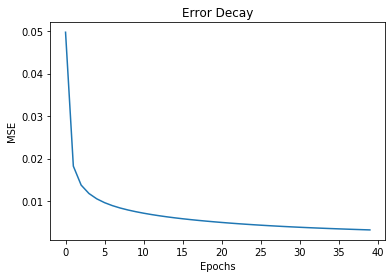

Accuracy of my model, epochs = 40, num of nodes hidden layer = 32 : 96.77 %


Actual,0,1,2,3,4,5,6,7,8,9
Predicted,,,,,,,,,,
0,970,0,1,0,0,3,3,2,1,0
1,0,1117,4,2,0,1,2,2,7,0
2,7,1,999,6,2,0,5,6,5,1
3,1,1,6,978,0,7,1,10,2,4
4,1,1,3,0,949,0,7,3,1,17
5,8,1,0,7,2,864,4,1,2,3
6,10,2,0,0,4,10,925,0,7,0
7,1,9,14,3,3,0,2,989,1,6
8,5,1,6,10,7,6,4,4,925,6


In [9]:
# 32 nodes in hidden layer

__errors__ = []
epochs = 40

network = Network()
network.add(NeuronLayer(28*28, 32))                                    # input layer
network.add(ActivationLayer(sigmoid, sigmoid_dash))                    # sigmoid activation layer
network.add(NeuronLayer(32, 32))                                       # hidden layer with 32 nodes
network.add(ActivationLayer(sigmoid, sigmoid_dash))                    # sigmoid activation layer                    
network.add(NeuronLayer(32, 10))                                       # output layer
network.add(ActivationLayer(sigmoid, sigmoid_dash))                    # sigmoid activation layer 

network.fit(x_train, y_train, epochs = epochs, learning_rate = 0.1)    # training netwwork

plt.plot(range(epochs), __errors__)
plt.title('Error Decay')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

y_pred = []
for i in range(len(x_test)):
    y_pred.append(np.argmax(network.predict(x_test[i])))
y_pred = np.array(y_pred)

print('Accuracy of my model, epochs = 40, num of nodes hidden layer = 32 : {} %'.
      format(metrics.accuracy_score(test[:,0], y_pred) * 100))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(test[:,0], y_pred))
conf_matrix.rename_axis("Predicted", axis = 0, inplace = True)
conf_matrix.rename_axis("Actual", axis = 1, inplace = True)
conf_matrix

Epoch 1/40, MSE ==> 0.028599
Epoch 4/40, MSE ==> 0.009620
Epoch 8/40, MSE ==> 0.006388
Epoch 12/40, MSE ==> 0.004851
Epoch 16/40, MSE ==> 0.003893
Epoch 20/40, MSE ==> 0.003226
Epoch 24/40, MSE ==> 0.002720
Epoch 28/40, MSE ==> 0.002329
Epoch 32/40, MSE ==> 0.002020
Epoch 36/40, MSE ==> 0.001774
Epoch 40/40, MSE ==> 0.001573


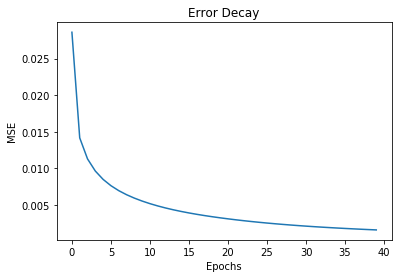

Accuracy of my model, epochs = 40, num of nodes hidden layer = 128 : 97.53 %


Actual,0,1,2,3,4,5,6,7,8,9
Predicted,,,,,,,,,,
0,971,0,0,0,1,2,2,1,3,0
1,0,1125,2,2,0,1,2,0,3,0
2,5,0,1010,1,1,2,3,6,2,2
3,0,0,4,990,0,3,0,5,3,5
4,1,0,3,0,960,1,3,1,0,13
5,4,0,0,13,2,859,6,0,4,4
6,7,3,4,0,3,5,933,0,3,0
7,2,7,12,2,1,1,1,994,1,7
8,7,0,3,7,6,4,4,2,938,3


In [10]:
# 128 nodes in hidden layer

__errors__ = []
epochs = 40

network = Network()
network.add(NeuronLayer(28*28, 128))                                    # input layer
network.add(ActivationLayer(sigmoid, sigmoid_dash))                     # sigmoid activation layer
network.add(NeuronLayer(128, 128))                                      # hidden layer with 128 nodes
network.add(ActivationLayer(sigmoid, sigmoid_dash))                     # sigmoid activation layer                    
network.add(NeuronLayer(128, 10))                                       # output layer
network.add(ActivationLayer(sigmoid, sigmoid_dash))                     # sigmoid activation layer 

network.fit(x_train, y_train, epochs = epochs, learning_rate = 0.1)     # training netwwork

plt.plot(range(epochs), __errors__)
plt.title('Error Decay')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

y_pred = []
for i in range(len(x_test)):
    y_pred.append(np.argmax(network.predict(x_test[i])))
y_pred = np.array(y_pred)

print('Accuracy of my model, epochs = 40, num of nodes hidden layer = 128 : {} %'.
      format(metrics.accuracy_score(test[:,0], y_pred) * 100))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(test[:,0], y_pred))
conf_matrix.rename_axis("Predicted", axis = 0, inplace = True)
conf_matrix.rename_axis("Actual", axis = 1, inplace = True)
conf_matrix

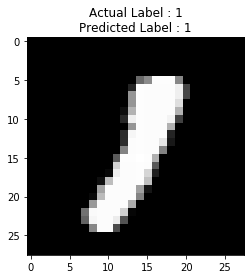

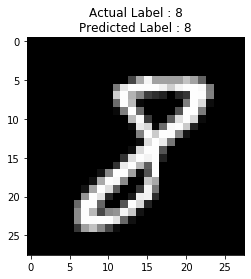

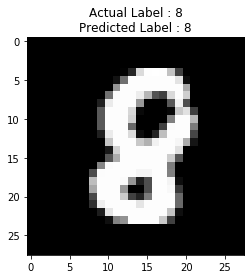

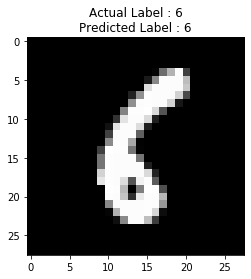

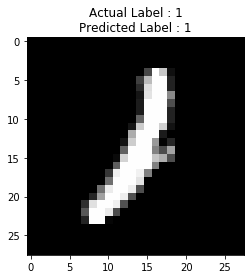

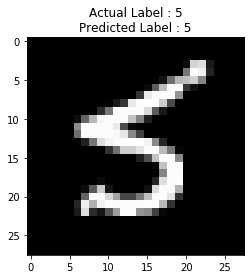

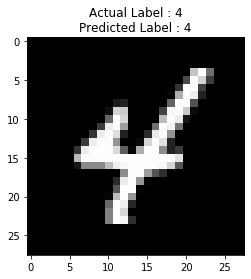

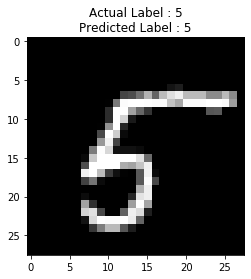

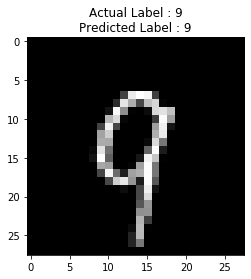

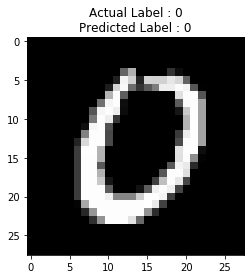

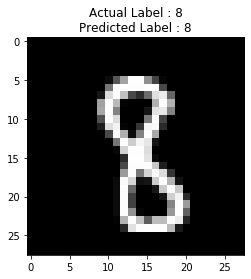

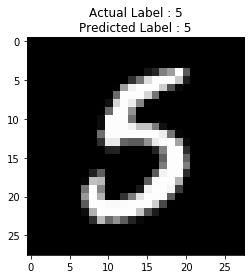

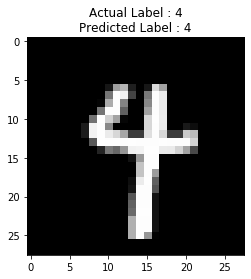

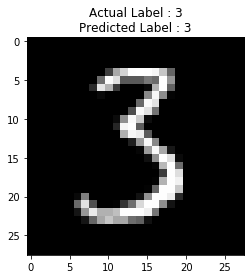

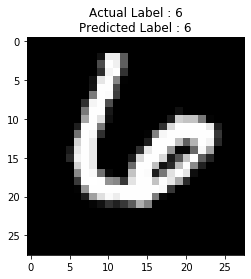

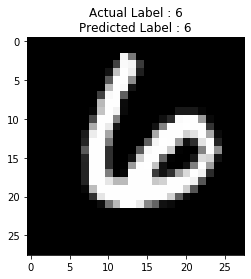

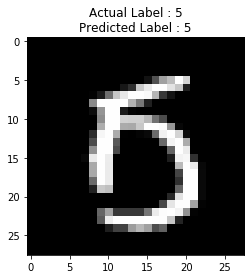

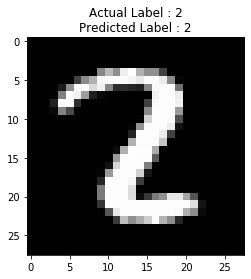

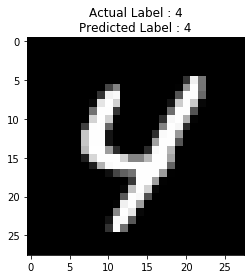

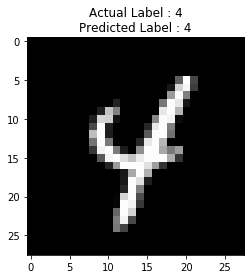

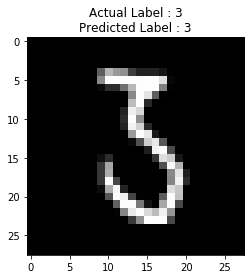

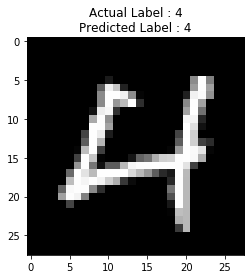

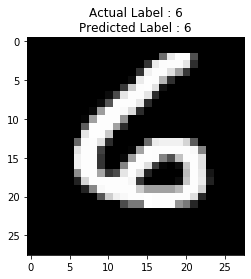

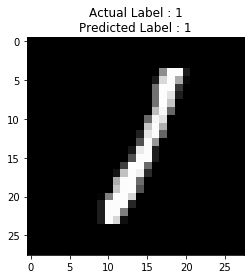

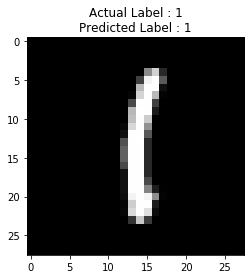

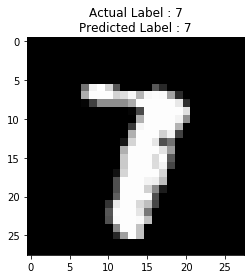

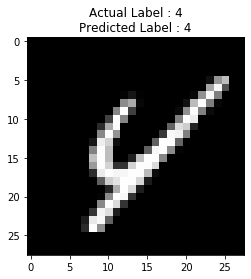

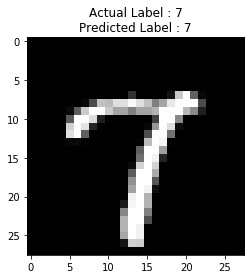

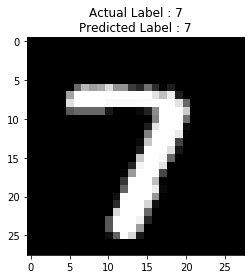

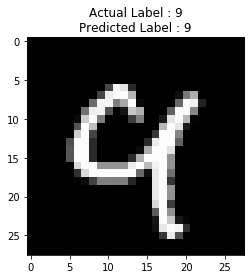

In [11]:
# displaying 30 random results
for i in range(30):
    index = np.random.randint(len(x_test))
    y_pred = np.argmax(network.predict(x_test[index]))
    plt.title('Actual Label : {}\nPredicted Label : {}'.format(np.argmax(y_test[index]), y_pred))
    plt.imshow(x_test[index].reshape((28,28)), cmap = 'gray')
    plt.show()

# Part - B

In [12]:
# data preparation
x_train = train[:,1:]
y_train = train[:,0]
x_test = test[:,1:]
y_test = test[:,0]
x_train /= 255
x_test /= 255

In [13]:
fitted_model = MLPClassifier(hidden_layer_sizes = (32,),
                             max_iter = 20,
                             learning_rate_init = 0.001,
                             random_state = 0,
                             activation = 'logistic').fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)

print('Accuracy of MLPClassifier, max_iter = 20, hidden_layer_sizes = (32,)  = {} %'.
      format(metrics.accuracy_score(y_test, y_pred) * 100))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(test[:,0], y_pred))
conf_matrix.rename_axis("Predicted", axis = 0, inplace = True)
conf_matrix.rename_axis("Actual", axis = 1, inplace = True)
conf_matrix

Accuracy of MLPClassifier, max_iter = 20, hidden_layer_sizes = (32,)  = 95.41 %


Actual,0,1,2,3,4,5,6,7,8,9
Predicted,,,,,,,,,,
0,961,0,1,1,1,5,7,2,1,1
1,0,1121,6,0,0,1,2,2,3,0
2,6,2,974,10,7,2,6,6,15,4
3,1,0,13,952,1,14,0,14,11,4
4,1,1,5,0,941,0,7,1,2,24
5,4,3,0,15,3,835,10,3,12,7
6,9,3,1,2,4,9,929,0,1,0
7,0,9,17,6,4,1,0,972,1,18
8,6,6,4,14,7,9,5,7,912,4


In [14]:
fitted_model = MLPClassifier(hidden_layer_sizes = (32,),
                             max_iter = 200,
                             learning_rate_init = 0.001,
                             random_state = 0,
                             activation = 'logistic').fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)

print('Accuracy of MLPClassifier, max_iter = 200, hidden_layer_sizes = (32,)  = {} %'.
      format(metrics.accuracy_score(y_test, y_pred) * 100))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(test[:,0], y_pred))
conf_matrix.rename_axis("Predicted", axis = 0, inplace = True)
conf_matrix.rename_axis("Actual", axis = 1, inplace = True)
conf_matrix

Accuracy of MLPClassifier, max_iter = 200, hidden_layer_sizes = (32,)  = 95.59 %


Actual,0,1,2,3,4,5,6,7,8,9
Predicted,,,,,,,,,,
0,961,0,2,1,1,5,3,4,1,2
1,1,1120,4,1,0,0,2,1,6,0
2,6,0,973,12,6,3,8,9,14,1
3,1,1,14,961,2,14,1,7,6,3
4,2,0,5,1,937,1,4,4,4,24
5,3,2,0,20,1,841,9,3,9,4
6,7,2,4,0,7,10,924,1,3,0
7,3,8,9,10,4,0,0,986,3,5
8,7,5,7,12,9,7,7,5,912,3


In [15]:
fitted_model = MLPClassifier(hidden_layer_sizes = (128,),
                             max_iter = 200,
                             learning_rate_init = 0.001,
                             random_state = 0,
                             activation = 'logistic').fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)

print('Accuracy of MLPClassifier, max_iter = 200, hidden_layer_sizes = (128,)  = {} %'.
      format(metrics.accuracy_score(y_test, y_pred) * 100))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(test[:,0], y_pred))
conf_matrix.rename_axis("Predicted", axis = 0, inplace = True)
conf_matrix.rename_axis("Actual", axis = 1, inplace = True)
conf_matrix

Accuracy of MLPClassifier, max_iter = 200, hidden_layer_sizes = (128,)  = 97.78 %


Actual,0,1,2,3,4,5,6,7,8,9
Predicted,,,,,,,,,,
0,969,0,1,1,0,0,4,2,2,1
1,1,1123,4,0,0,0,2,1,4,0
2,4,1,1011,3,1,0,2,5,4,1
3,0,0,6,992,0,5,1,4,1,1
4,1,0,1,1,964,2,4,0,3,6
5,2,1,0,10,1,864,6,1,5,2
6,5,2,0,1,2,6,939,0,3,0
7,1,1,9,2,2,0,0,1009,2,2
8,4,1,3,8,8,4,3,2,936,5


In [16]:
fitted_model = MLPClassifier(hidden_layer_sizes = (32, 64),
                             max_iter = 200,
                             learning_rate_init = 0.001,
                             random_state = 0,
                             activation = 'logistic').fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)

print('Accuracy of MLPClassifier, max_iter = 100, hidden_layer_sizes = (32, 64)  = {} %'.
      format(metrics.accuracy_score(y_test, y_pred) * 100))

conf_matrix = pd.DataFrame(metrics.confusion_matrix(test[:,0], y_pred))
conf_matrix.rename_axis("Predicted", axis = 0, inplace = True)
conf_matrix.rename_axis("Actual", axis = 1, inplace = True)
conf_matrix

Accuracy of MLPClassifier, max_iter = 100, hidden_layer_sizes = (32, 64)  = 96.17 %


Actual,0,1,2,3,4,5,6,7,8,9
Predicted,,,,,,,,,,
0,963,0,6,0,1,3,4,2,1,0
1,0,1117,4,4,0,1,3,3,3,0
2,4,4,986,7,3,0,9,9,9,1
3,3,3,6,964,0,13,0,10,7,4
4,1,1,4,1,948,0,6,3,3,15
5,3,3,0,15,2,843,9,3,12,2
6,7,2,5,0,2,9,931,0,2,0
7,2,3,12,8,3,0,0,984,5,11
8,7,1,4,13,1,7,4,4,927,6
